In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load datasets
activity_data = pd.read_csv('AUM_V4_Activity_2024-12-11_20-11-14.csv')
notification_data = pd.read_csv('AUM_V4_Notification_2024-12-11_20-12-15.csv')
usage_data = pd.read_csv('AUM_V4_Usage_2024-12-11_20-10-15.csv')
weather_data = pd.read_csv('london_dynamic_room_temperatures.csv')

/var/folders/yz/h_0c8vlx4plghxkn48_qbd9h0000gn/T/ipykernel_82840/1117256697.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], errors='coerce')


Correlation between cloud cover and usage time: 0.017782595877890307


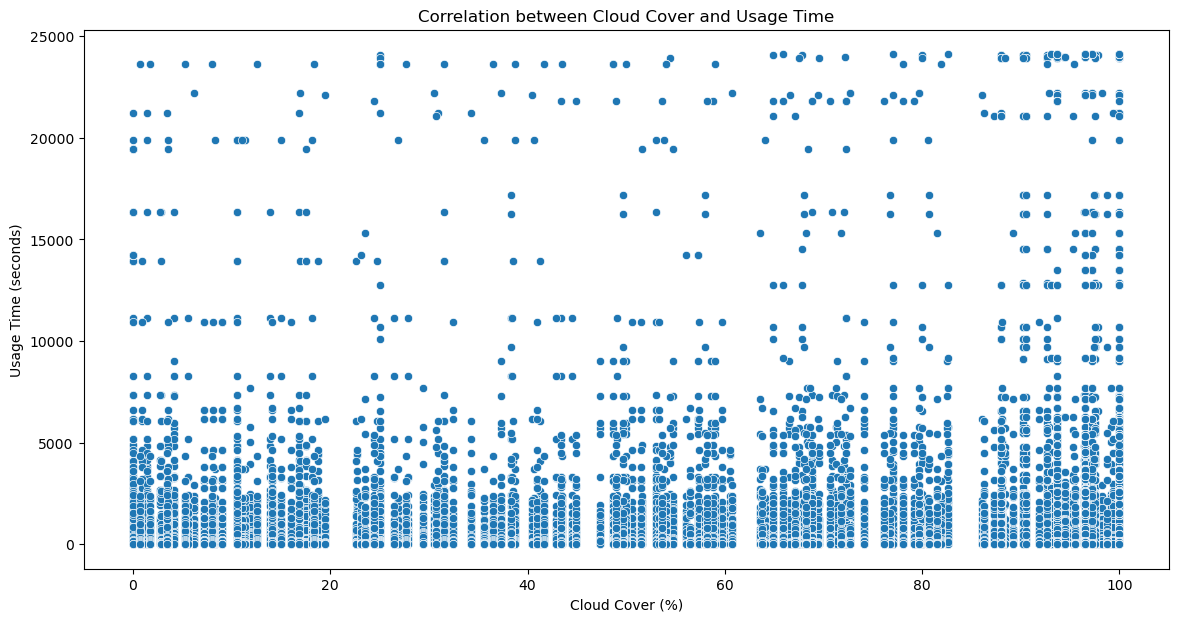

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from scipy.stats import pearsonr

# Standardize column names for activity data
activity_data.columns = ['app_name', 'date', 'time', 'duration']

# Convert date column to datetime type with specified format
activity_data['date'] = pd.to_datetime(activity_data['date'], format='%m/%d/%y')

# Convert duration to total seconds
def convert_to_seconds(duration_str):
    try:
        h, m, s = map(int, duration_str.split(':'))
        return timedelta(hours=h, minutes=m, seconds=s).total_seconds()
    except ValueError:
        return 0  # or handle the error as needed

activity_data['duration_seconds'] = activity_data['duration'].apply(convert_to_seconds)

# Standardize column names for weather data
weather_data.columns = ['name', 'datetime', 'outdoor_temp', 'humidity', 'windspeed', 'cloudcover', 'conditions', 'room_temp']

# Convert datetime column to datetime type
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], errors='coerce')

# Extract date from datetime
weather_data['date'] = weather_data['datetime'].dt.date

# Convert date column to datetime type
weather_data['date'] = pd.to_datetime(weather_data['date'])

# # Check the data
# print(activity_data.head())
# print(weather_data.head())

# Convert date column in activity_data to datetime type
activity_data['date'] = pd.to_datetime(activity_data['date'])

# Merge activity data with weather data on date
merged_data = pd.merge(activity_data, weather_data, on='date')

# # Check the merged data
# print(merged_data.head())

# Calculate the correlation between cloud cover and usage time
correlation, _ = pearsonr(merged_data['cloudcover'], merged_data['duration_seconds'])
print(f"Correlation between cloud cover and usage time: {correlation}")

# Visualize the correlation
plt.figure(figsize=(14, 7))
sns.scatterplot(x='cloudcover', y='duration_seconds', data=merged_data)
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Usage Time (seconds)')
plt.title('Correlation between Cloud Cover and Usage Time')
plt.show()

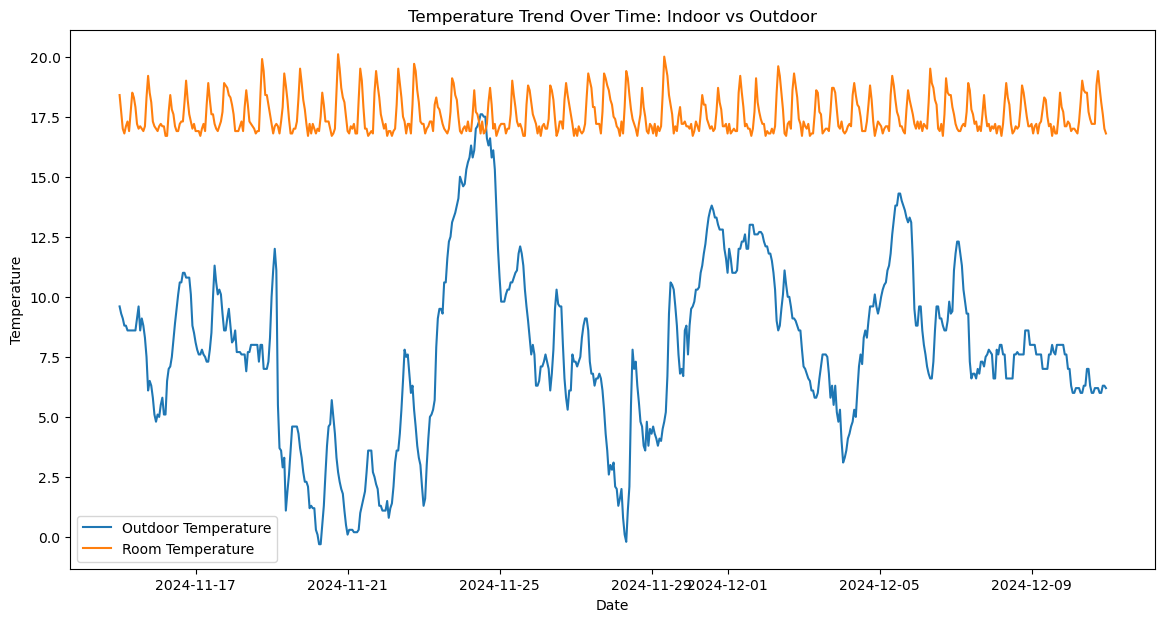

In [190]:
# Convert datetime column to datetime type
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Standardize column names
weather_data.columns = [col.strip().lower().replace(' ', '_') for col in weather_data.columns]

# Exclude non-numeric columns
numeric_data = weather_data.select_dtypes(include=['float64', 'int64'])

# # Create a heatmap
# corr = numeric_data.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

# Create a time series trend plot
weather_data.set_index('datetime', inplace=True)
plt.figure(figsize=(14, 7))
plt.plot(weather_data['outdoor_temp'], label='Outdoor Temperature')
plt.plot(weather_data['room_temp'], label='Room Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Trend Over Time: Indoor vs Outdoor')
plt.legend()
plt.show()


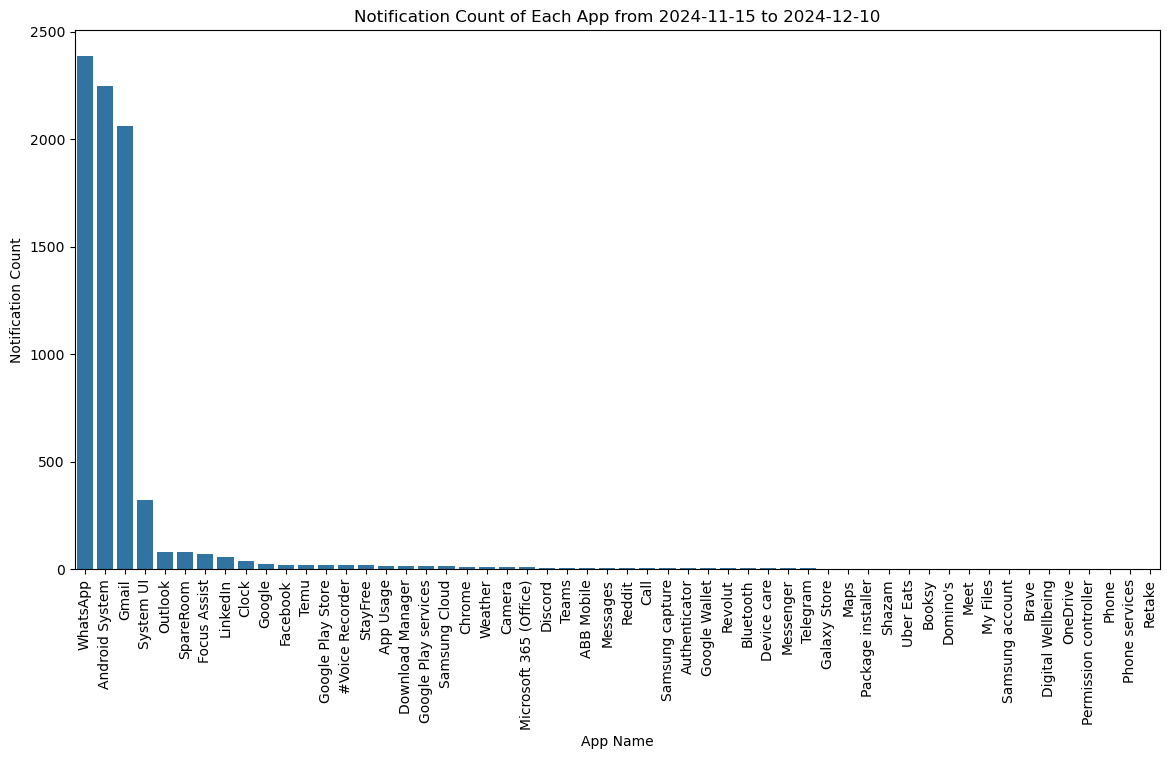

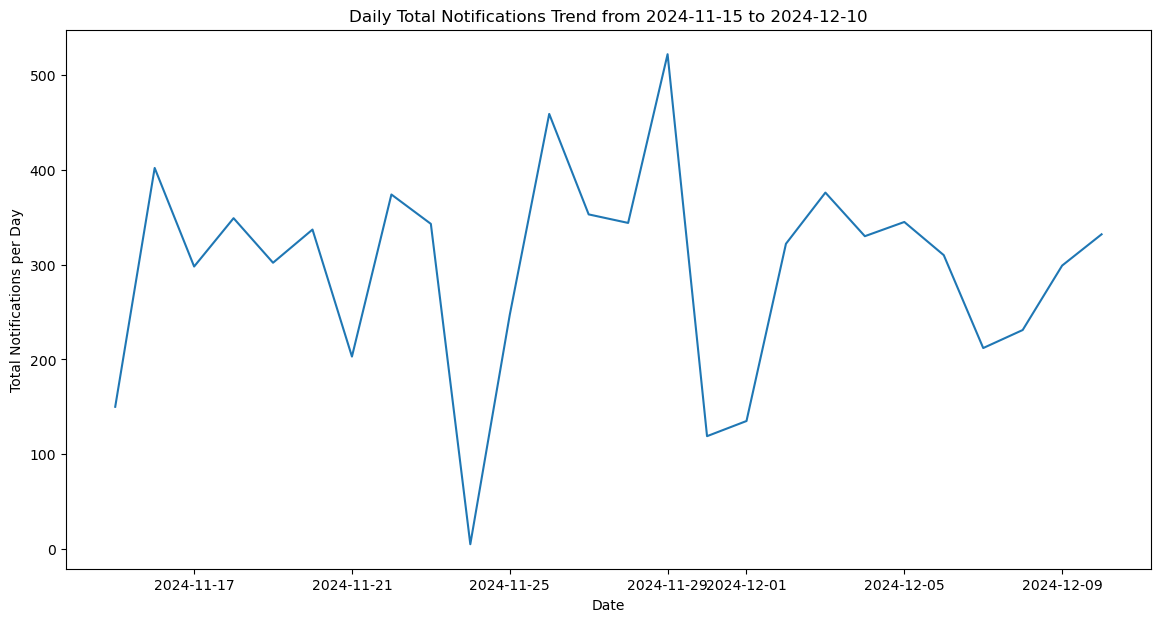

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Standardize column names
notification_data.columns = ['app_name', 'notification_count', 'date', 'total_notifications_per_day']

# Convert date column to datetime type with specified format
notification_data['date'] = pd.to_datetime(notification_data['date'], format='%m/%d/%y')

# Bar Plot for notification count per app
plt.figure(figsize=(14, 7))
sns.barplot(x='app_name', y='notification_count', data=notification_data)
plt.xticks(rotation=90)
plt.xlabel('App Name')
plt.ylabel('Notification Count')
plt.title('Notification Count of Each App from 2024-11-15 to 2024-12-10')
plt.show()

# Time Series Plot for daily total notifications
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='total_notifications_per_day', data=notification_data)
plt.xlabel('Date')
plt.ylabel('Total Notifications per Day')
plt.title('Daily Total Notifications Trend from 2024-11-15 to 2024-12-10')
plt.show()

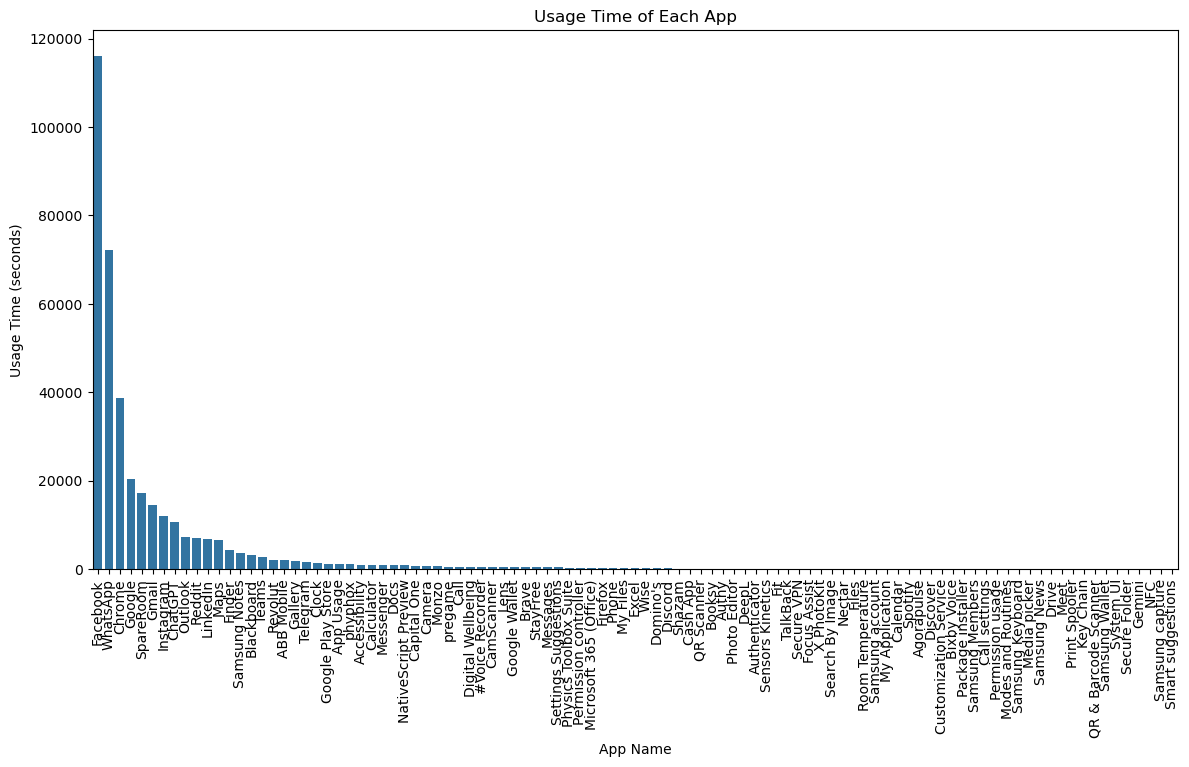

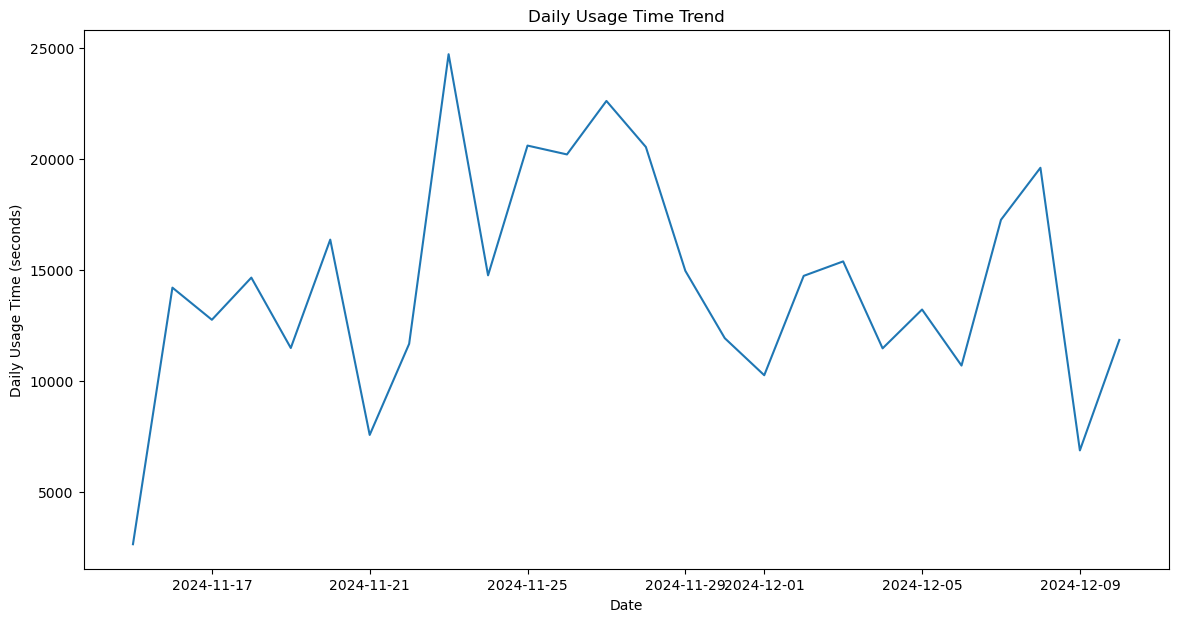

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

# Standardize column names
usage_data.columns = ['app_name', 'usage_time', 'access_count', 'date', 'daily_usage_time']

# Convert date column to datetime type with specified format
usage_data['date'] = pd.to_datetime(usage_data['date'], format='%m/%d/%y')

# Convert usage time and daily usage time to total seconds
def convert_to_seconds(time_str):
    try:
        h, m, s = map(int, str(time_str).split(':'))
        return timedelta(hours=h, minutes=m, seconds=s).total_seconds()
    except ValueError:
        return 0  # or handle the error as needed

usage_data['usage_time_seconds'] = usage_data['usage_time'].apply(convert_to_seconds)
usage_data['daily_usage_time_seconds'] = usage_data['daily_usage_time'].apply(convert_to_seconds)

# Bar Plot for usage time per app
plt.figure(figsize=(14, 7))
sns.barplot(x='app_name', y='usage_time_seconds', data=usage_data)
plt.xticks(rotation=90)
plt.xlabel('App Name')
plt.ylabel('Usage Time (seconds)')
plt.title('Usage Time of Each App')
plt.show()

# Time Series Plot for daily usage time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='daily_usage_time_seconds', data=usage_data)
plt.xlabel('Date')
plt.ylabel('Daily Usage Time (seconds)')
plt.title('Daily Usage Time Trend')
plt.show()

In [193]:
usage_data.head()

,app_name,usage_time,access_count,date,daily_usage_time,usage_time_seconds,daily_usage_time_seconds
0,Facebook,32:14:51,702.0,2024-12-10,3:17:20,116091.0,11840.0
1,WhatsApp,20:03:04,1806.0,2024-12-09,1:54:16,72184.0,6856.0
2,Chrome,10:45:49,790.0,2024-12-08,5:26:47,38749.0,19607.0
3,Google,5:38:56,836.0,2024-12-07,4:47:39,20336.0,17259.0
4,SpareRoom,4:49:01,502.0,2024-12-06,2:58:03,17341.0,10683.0


Correlation between daily notifications and daily usage time: 0.3149945768089365


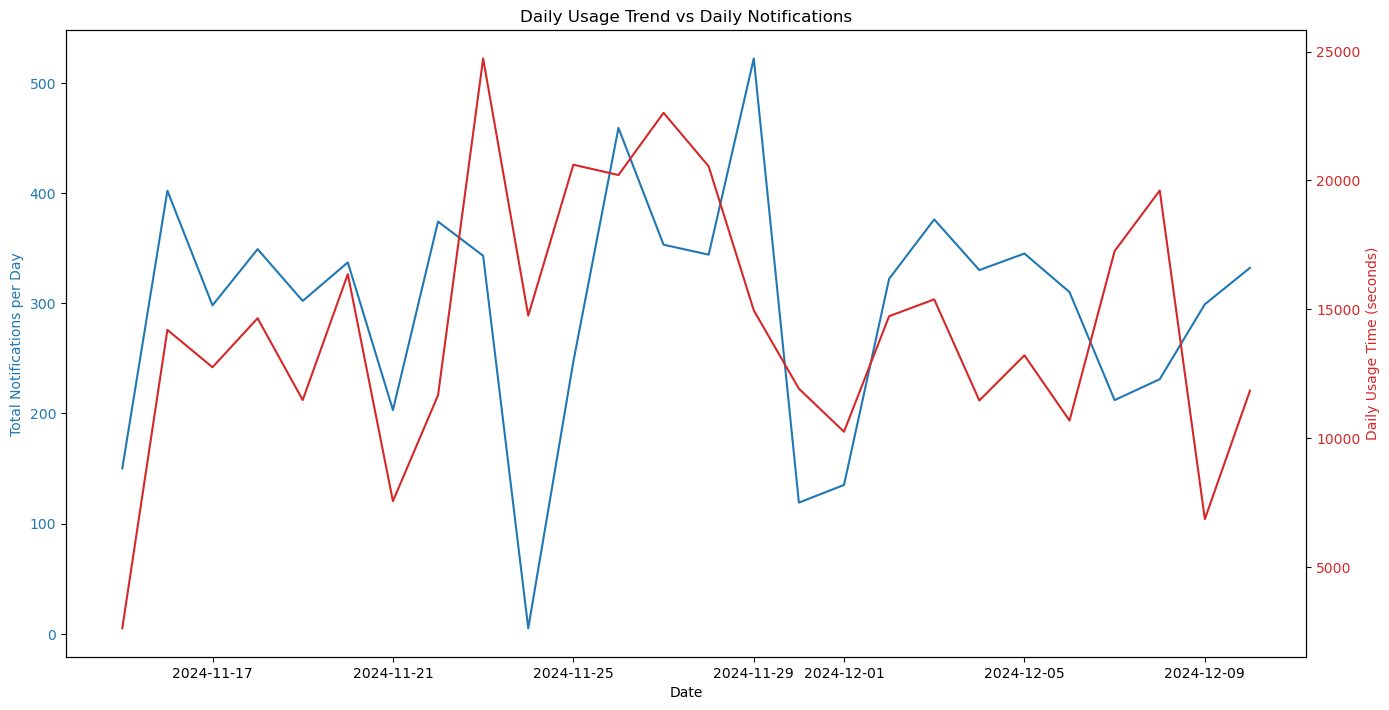

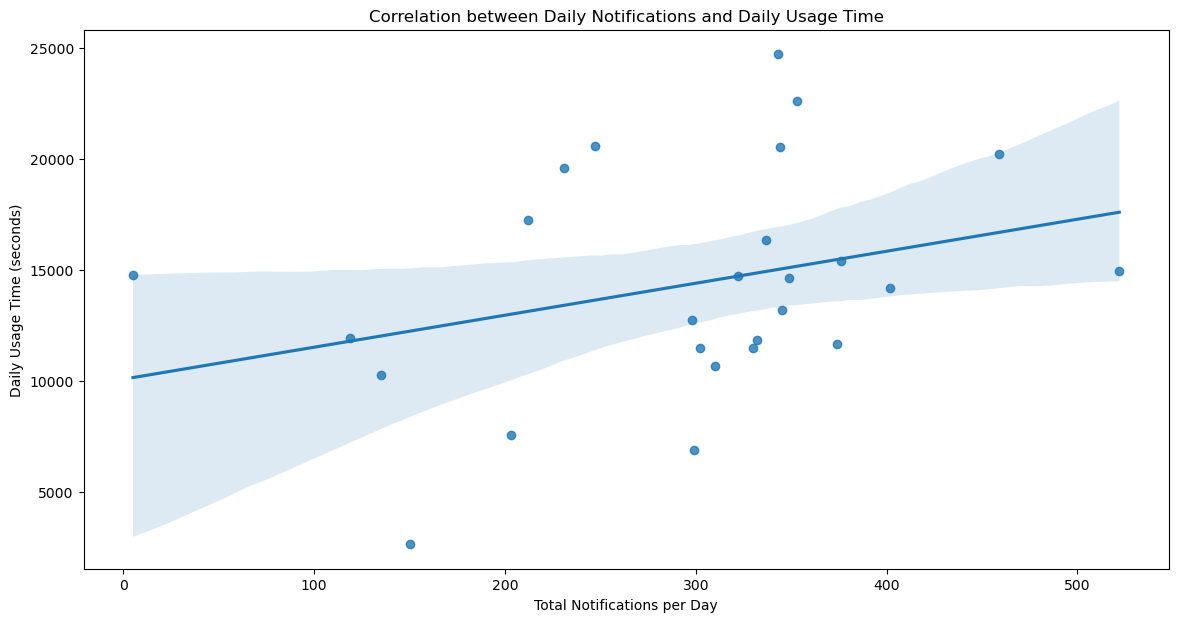

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import StandardScaler

# Load datasets
notification_data = pd.read_csv('AUM_V4_Notification_2024-12-11_20-12-15.csv')
usage_data = pd.read_csv('AUM_V4_Usage_2024-12-11_20-10-15.csv')

# Standardize column names for notification data
notification_data.columns = ['app_name', 'notification_count', 'date', 'total_notifications_per_day']

# Convert date column to datetime type with specified format
notification_data['date'] = pd.to_datetime(notification_data['date'], format='%m/%d/%y')

# Standardize column names for usage data
usage_data.columns = ['app_name', 'usage_time', 'access_count', 'date', 'daily_usage_time']

# Convert date column to datetime type with specified format
usage_data['date'] = pd.to_datetime(usage_data['date'], format='%m/%d/%y')

# Convert usage time and daily usage time to total seconds
def convert_to_seconds(time_str):
    try:
        h, m, s = map(int, str(time_str).split(':'))
        return timedelta(hours=h, minutes=m, seconds=s).total_seconds()
    except ValueError:
        return 0  # or handle the error as needed

usage_data['usage_time_seconds'] = usage_data['usage_time'].apply(convert_to_seconds)
usage_data['daily_usage_time_seconds'] = usage_data['daily_usage_time'].apply(convert_to_seconds)

# Aggregate data by day
# Aggregate notification data by day
notification_daily = notification_data.groupby('date')['total_notifications_per_day'].sum().reset_index()

# Aggregate usage data by day
usage_daily = usage_data.groupby('date')['daily_usage_time_seconds'].sum().reset_index()

# Merge the data on date
merged_daily_data = pd.merge(notification_daily, usage_daily, on='date')

# Calculate the correlation
correlation = merged_daily_data['total_notifications_per_day'].corr(merged_daily_data['daily_usage_time_seconds'])
print(f"Correlation between daily notifications and daily usage time: {correlation}")

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Notifications per Day', color=color)
ax1.plot(merged_daily_data['date'], merged_daily_data['total_notifications_per_day'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Daily Usage Time (seconds)', color=color)
ax2.plot(merged_daily_data['date'], merged_daily_data['daily_usage_time_seconds'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Daily Usage Trend vs Daily Notifications')
plt.show()

# Scatter Plot with Regression Line
plt.figure(figsize=(14, 7))
sns.regplot(x='total_notifications_per_day', y='daily_usage_time_seconds', data=merged_daily_data)
plt.xlabel('Total Notifications per Day')
plt.ylabel('Daily Usage Time (seconds)')
plt.title('Correlation between Daily Notifications and Daily Usage Time')
plt.show()

Index(['app_name', 'date', 'time', 'duration', 'duration_seconds'], dtype='object')


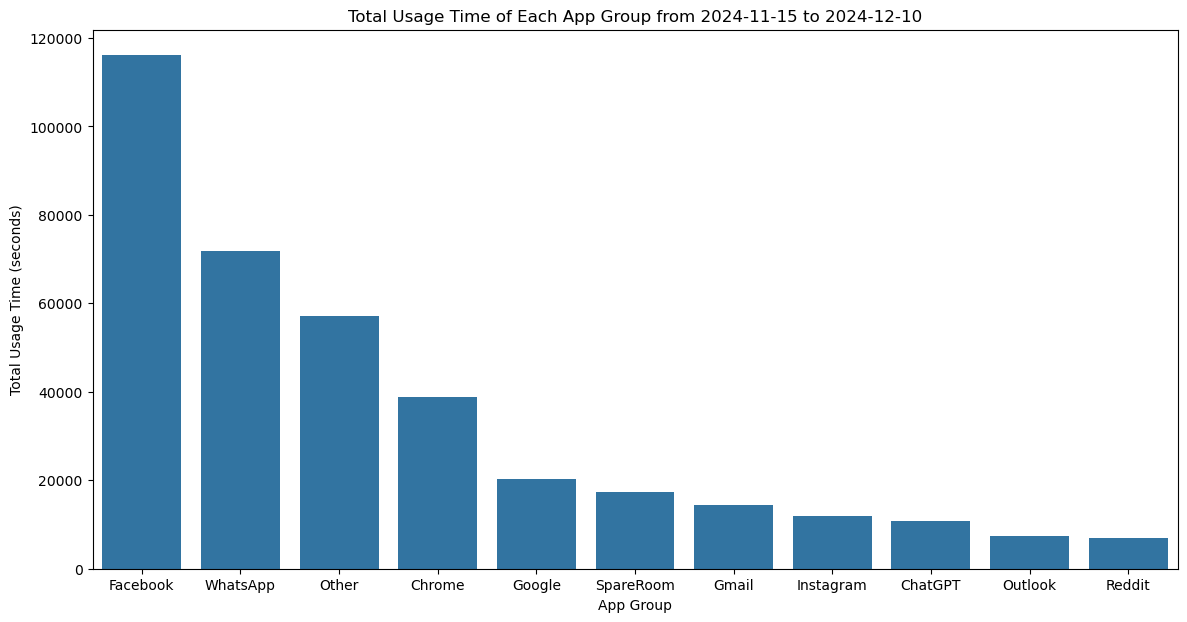

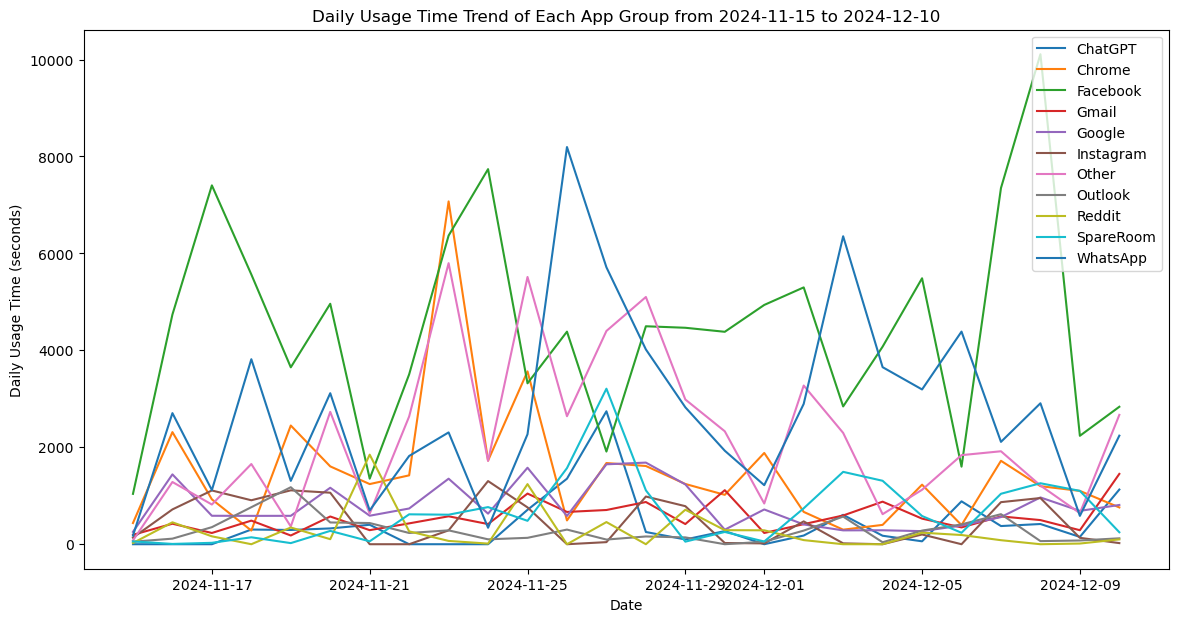

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

# # Load activity data
# activity_data = pd.read_csv('path_to_activity_file.csv')

# Inspect the columns in activity_data
print(activity_data.columns)

# Standardize column names for activity data based on inspection
activity_data.columns = ['app_name', 'date', 'time', 'duration', 'extra_column']  # Adjust based on actual columns

# Drop the extra column if it exists
if 'extra_column' in activity_data.columns:
    activity_data = activity_data.drop(columns=['extra_column'])

# Filter out "screen off" and "locked" activities
activity_data = activity_data[~activity_data['app_name'].str.contains('screen off|locked|device shutdown', case=False)]

# Convert date column to datetime type with specified format
activity_data['date'] = pd.to_datetime(activity_data['date'], format='%Y-%m-%d')

# Convert duration to total seconds
def convert_to_seconds(duration_str):
    try:
        h, m, s = map(int, duration_str.split(':'))
        return timedelta(hours=h, minutes=m, seconds=s).total_seconds()
    except ValueError:
        return 0  # or handle the error as needed

activity_data['duration_seconds'] = activity_data['duration'].apply(convert_to_seconds)

# Identify top 10 most used apps
total_duration_per_app = activity_data.groupby('app_name')['duration_seconds'].sum().sort_values(ascending=False)
top_10_apps = total_duration_per_app.head(10).index

# Group the rest as "Other"
activity_data['app_group'] = activity_data['app_name'].apply(lambda x: x if x in top_10_apps else 'Other')

# Aggregate the total duration of app usage per day for each app group
aggregated_data = activity_data.groupby(['date', 'app_group'])['duration_seconds'].sum().unstack(fill_value=0)

# Plot bar graph for total usage time of each app group
total_duration_per_group = aggregated_data.sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=total_duration_per_group.index, y=total_duration_per_group.values)
plt.xlabel('App Group')
plt.ylabel('Total Usage Time (seconds)')
plt.title('Total Usage Time of Each App Group from 2024-11-15 to 2024-12-10')
plt.show()

# Plot trend graph for daily usage time of each app group
plt.figure(figsize=(14, 7))
for app_group in aggregated_data.columns:
    sns.lineplot(x=aggregated_data.index, y=aggregated_data[app_group], label=app_group)
plt.xlabel('Date')
plt.ylabel('Daily Usage Time (seconds)')
plt.title('Daily Usage Time Trend of Each App Group from 2024-11-15 to 2024-12-10')
plt.legend()
plt.show()

/var/folders/yz/h_0c8vlx4plghxkn48_qbd9h0000gn/T/ipykernel_82840/3489988680.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  activity_data['datetime'] = pd.to_datetime(activity_data['date'] + ' ' + activity_data['time'])


Correlation between outdoor temperature and activity duration: 0.6449909538374835


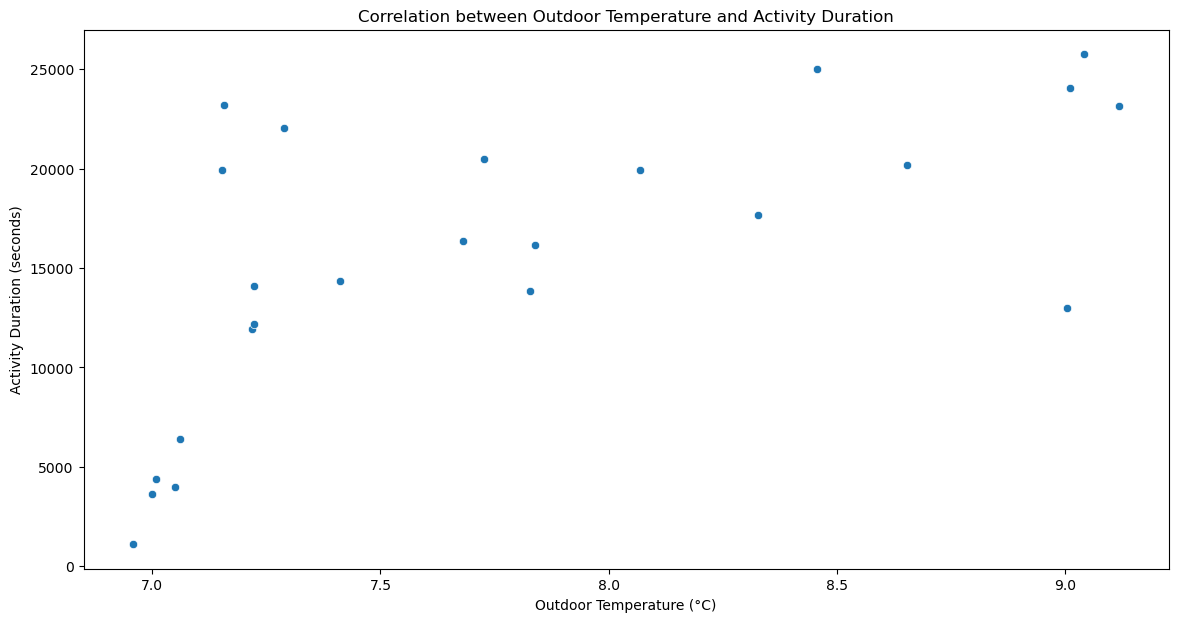

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# # Load datasets
# activity_data = pd.read_csv('AUM_V4_Activity_2024-12-11_20-11-14.csv')
# weather_data = pd.read_csv('london_dynamic_room_temperatures.csv')

# Ensure date and time columns are in string format
activity_data['date'] = activity_data['date'].astype(str)
activity_data['time'] = activity_data['time'].astype(str)

# Convert date and time columns to datetime in activity_data
activity_data['datetime'] = pd.to_datetime(activity_data['date'] + ' ' + activity_data['time'])

# Convert duration to total seconds
def convert_to_seconds(duration_str):
    try:
        h, m, s = map(int, duration_str.split(':'))
        return h * 3600 + m * 60 + s
    except ValueError:
        return 0  # or handle the error as needed

#activity_data['duration_seconds'] = activity_data['duration'].apply(convert_to_seconds)

# Extract hour from datetime
activity_data['hour'] = activity_data['datetime'].dt.hour

# Aggregate activity data by hour
activity_data_hourly = activity_data.groupby('hour')['duration_seconds'].sum().reset_index()

# Convert datetime column to datetime in weather_data
weather_data.index = pd.to_datetime(weather_data.index)

# Extract hour from datetime
weather_data['hour'] = weather_data.index.hour

# Aggregate weather data by hour
weather_data_hourly = weather_data.groupby('hour')['outdoor_temp'].mean().reset_index()

# Merge the data on hour
merged_data = pd.merge(activity_data_hourly, weather_data_hourly, on='hour')

# Calculate the correlation
correlation = merged_data['duration_seconds'].corr(merged_data['outdoor_temp'])
print(f"Correlation between outdoor temperature and activity duration: {correlation}")

# Visualize the correlation
plt.figure(figsize=(14, 7))
sns.scatterplot(x='outdoor_temp', y='duration_seconds', data=merged_data)
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Activity Duration (seconds)')
plt.title('Correlation between Outdoor Temperature and Activity Duration')
plt.show()

/var/folders/yz/h_0c8vlx4plghxkn48_qbd9h0000gn/T/ipykernel_82840/1141861999.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  activity_data['datetime'] = pd.to_datetime(activity_data['date'] + ' ' + activity_data['time'])
/var/folders/yz/h_0c8vlx4plghxkn48_qbd9h0000gn/T/ipykernel_82840/1141861999.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  activity_data_hourly = activity_data['duration_seconds'].resample('H').sum().reset_index()
/var/folders/yz/h_0c8vlx4plghxkn48_qbd9h0000gn/T/ipykernel_82840/1141861999.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
/var/folders/yz/h_0c8vlx

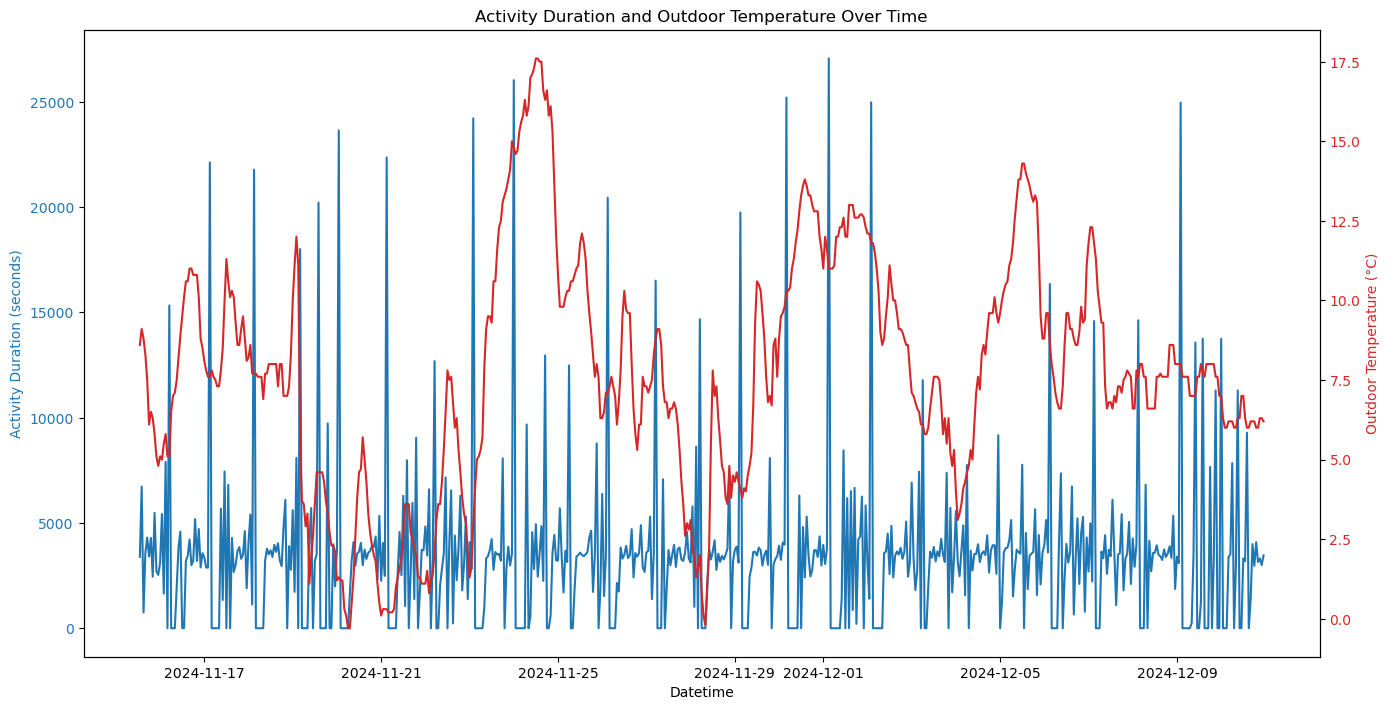

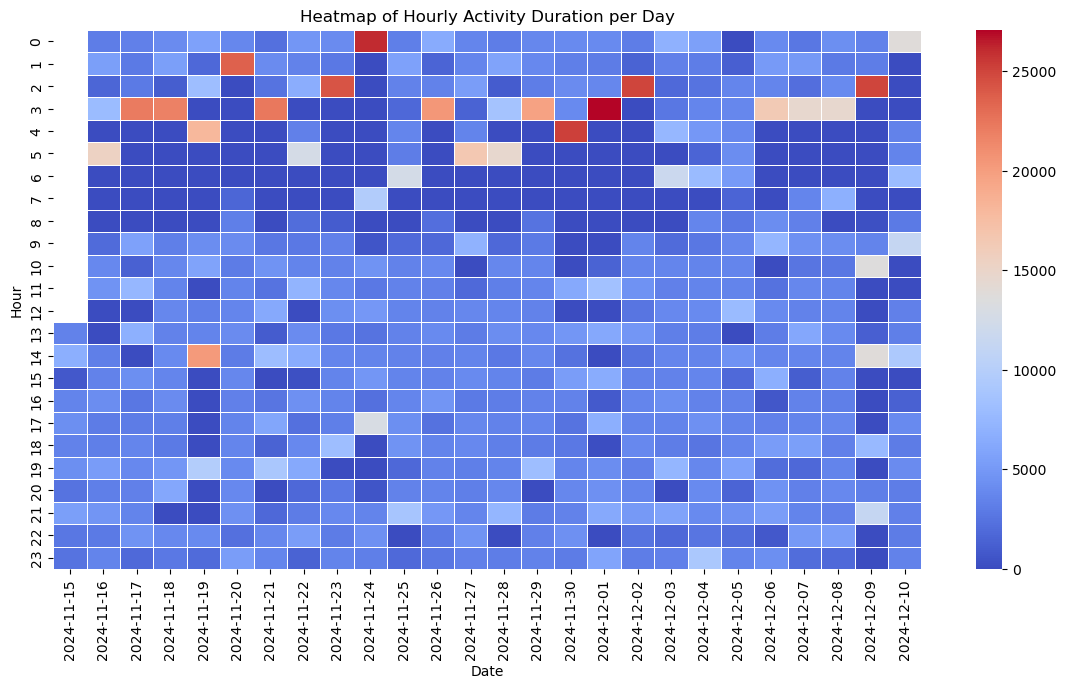

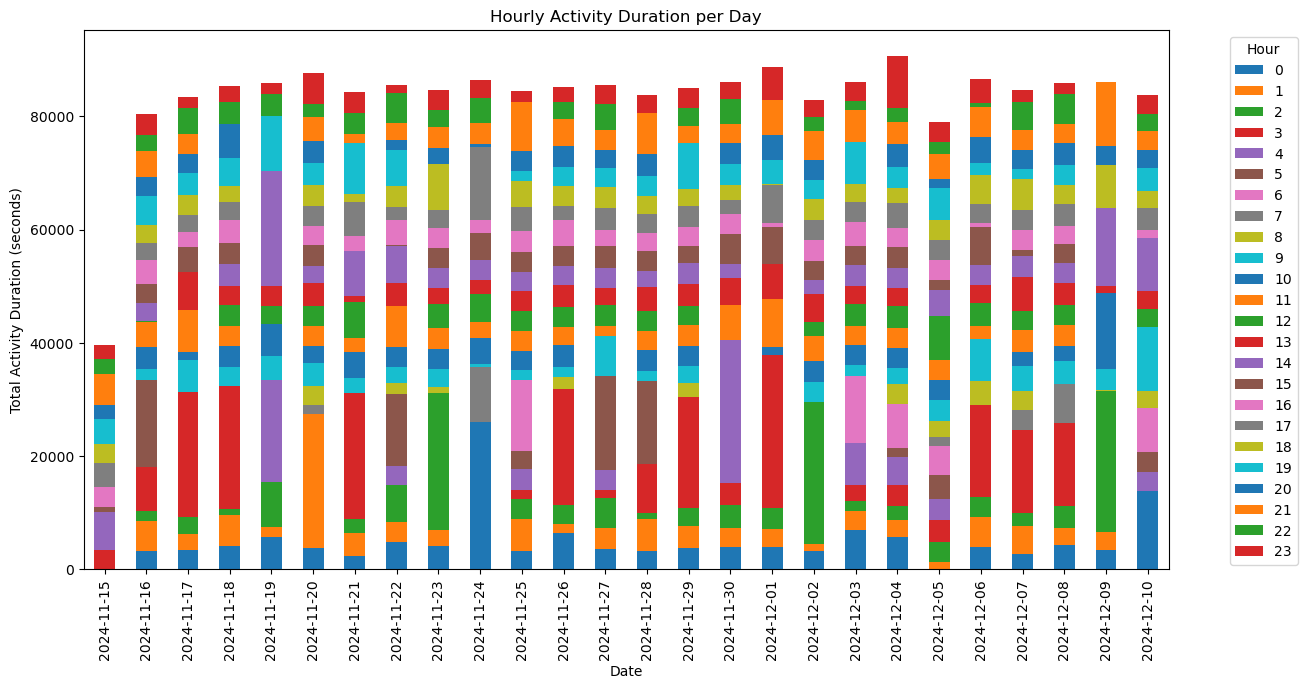

R-squared score for training set: 0.00011490408104419814
R-squared score for testing set: -0.043366191884459226


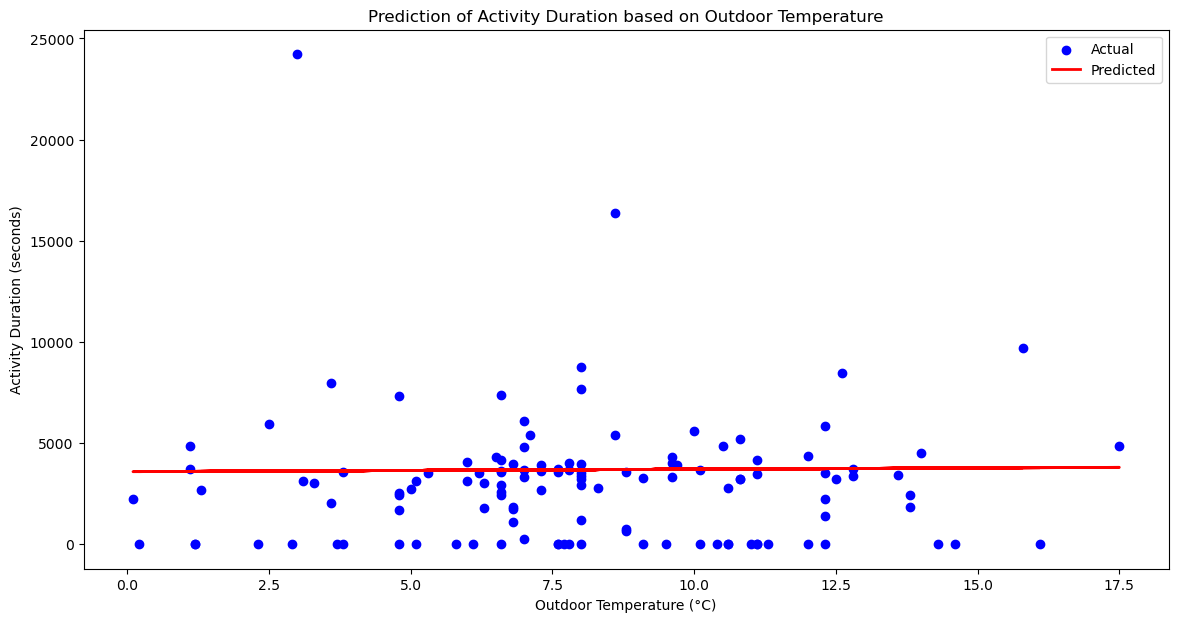

In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
activity_data = pd.read_csv('AUM_V4_Activity_2024-12-11_20-11-14.csv')
weather_data = pd.read_csv('london_dynamic_room_temperatures.csv')

# Ensure date and time columns are in string format
activity_data['date'] = activity_data['date'].astype(str)
activity_data['time'] = activity_data['time'].astype(str)

# Convert date and time columns to datetime in activity_data
activity_data['datetime'] = pd.to_datetime(activity_data['date'] + ' ' + activity_data['time'])

# Convert duration to total seconds
def convert_to_seconds(duration_str):
    try:
        h, m, s = map(int, duration_str.split(':'))
        return h * 3600 + m * 60 + s
    except ValueError:
        return 0  # or handle the error as needed

activity_data['duration_seconds'] = activity_data['duration'].apply(convert_to_seconds)

# Aggregate activity data by hour
activity_data.set_index('datetime', inplace=True)
activity_data_hourly = activity_data['duration_seconds'].resample('H').sum().reset_index()

# Convert datetime column to datetime in weather_data
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Aggregate weather data by hour
weather_data_hourly = weather_data[['datetime', 'outdoor_temp']].set_index('datetime').resample('H').mean().reset_index()

# Merge the data on datetime
merged_data = pd.merge(activity_data_hourly, weather_data_hourly, on='datetime')

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Activity Duration (seconds)', color=color)
ax1.plot(merged_data['datetime'], merged_data['duration_seconds'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Outdoor Temperature (°C)', color=color)
ax2.plot(merged_data['datetime'], merged_data['outdoor_temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Activity Duration and Outdoor Temperature Over Time')
plt.show()

# Create a heatmap for hourly usage per day
# Extract date and hour from datetime
activity_data_hourly['date'] = activity_data_hourly['datetime'].dt.date
activity_data_hourly['hour'] = activity_data_hourly['datetime'].dt.hour

# Pivot the data to create a matrix for the heatmap
heatmap_data = activity_data_hourly.pivot(index='hour', columns='date', values='duration_seconds')

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.xlabel('Date')
plt.ylabel('Hour')
plt.title('Heatmap of Hourly Activity Duration per Day')
plt.show()

# Create bar plots for hourly usage per day
# Aggregate the total duration per hour for each day
hourly_usage = activity_data_hourly.groupby(['date', 'hour'])['duration_seconds'].sum().unstack()

# Plot bar plots for each day
hourly_usage.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.xlabel('Date')
plt.ylabel('Total Activity Duration (seconds)')
plt.title('Hourly Activity Duration per Day')
plt.legend(title='Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Prepare the data for prediction
X = merged_data[['outdoor_temp']]
y = merged_data['duration_seconds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the R-squared score for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R-squared score for training set: {r2_train}")
print(f"R-squared score for testing set: {r2_test}")

# Visualize the predictions
plt.figure(figsize=(14, 7))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Activity Duration (seconds)')
plt.title('Prediction of Activity Duration based on Outdoor Temperature')
plt.legend()
plt.show()

/var/folders/yz/h_0c8vlx4plghxkn48_qbd9h0000gn/T/ipykernel_82840/3931062218.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  activity_data['datetime'] = pd.to_datetime(activity_data['date'] + ' ' + activity_data['time'])
/var/folders/yz/h_0c8vlx4plghxkn48_qbd9h0000gn/T/ipykernel_82840/3931062218.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  activity_data_hourly = activity_data['duration_seconds'].resample('H').sum().reset_index()
/var/folders/yz/h_0c8vlx4plghxkn48_qbd9h0000gn/T/ipykernel_82840/3931062218.py:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_data_hourly = weather_data[['datetime', 'room_temp']].set_index('datetime').resample('H').mean().reset_index()


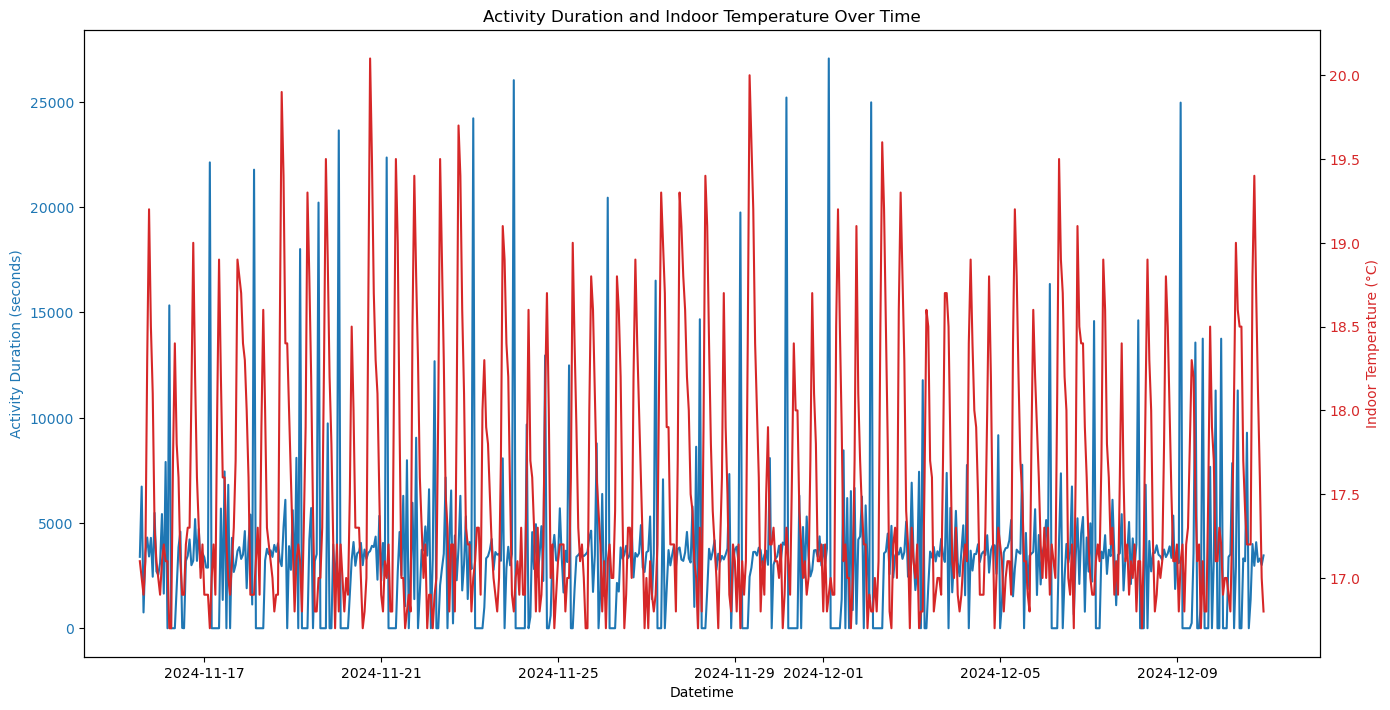

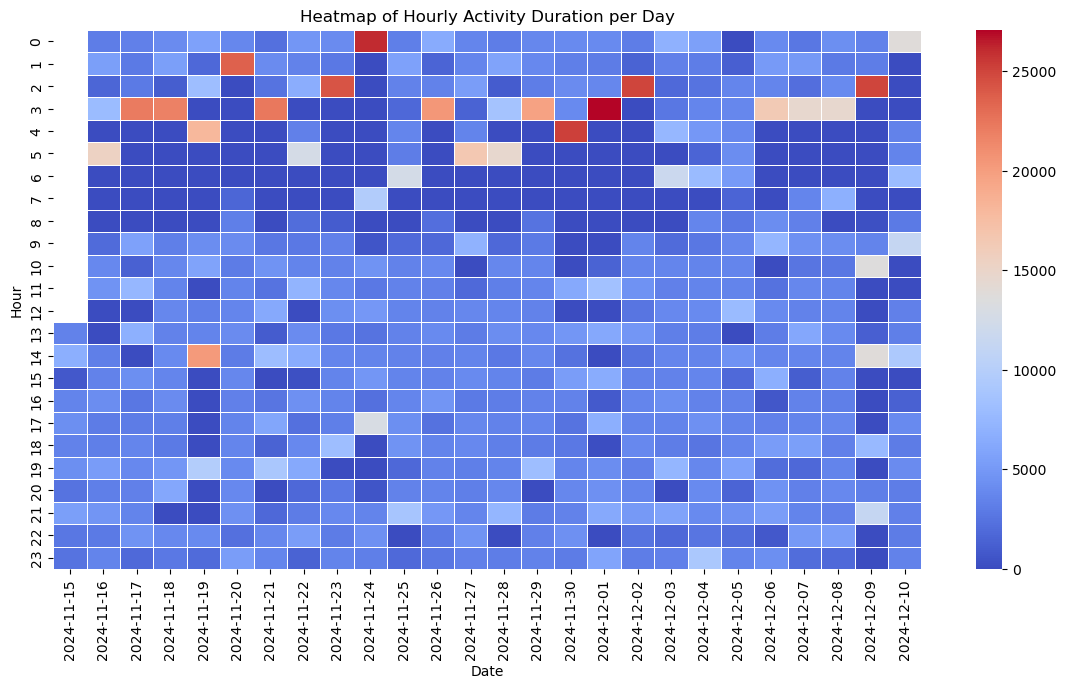

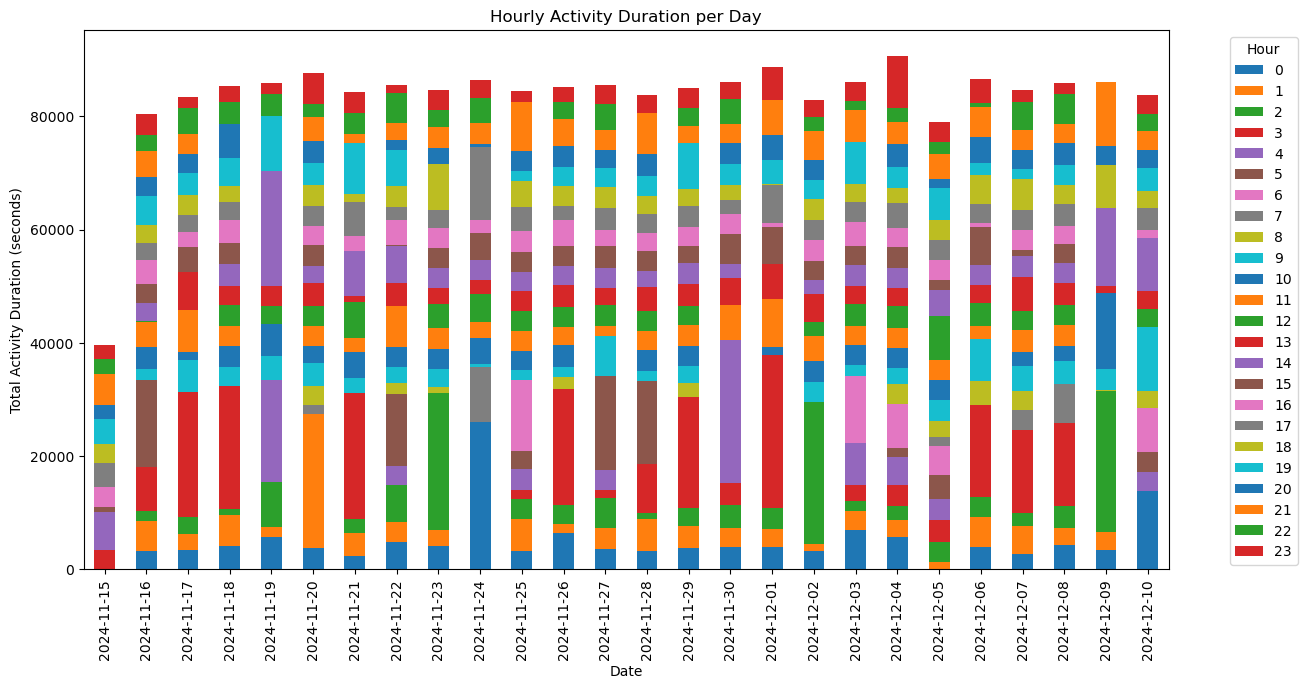

R-squared score for training set: 0.01733180580510929
R-squared score for testing set: -0.05891793378316068


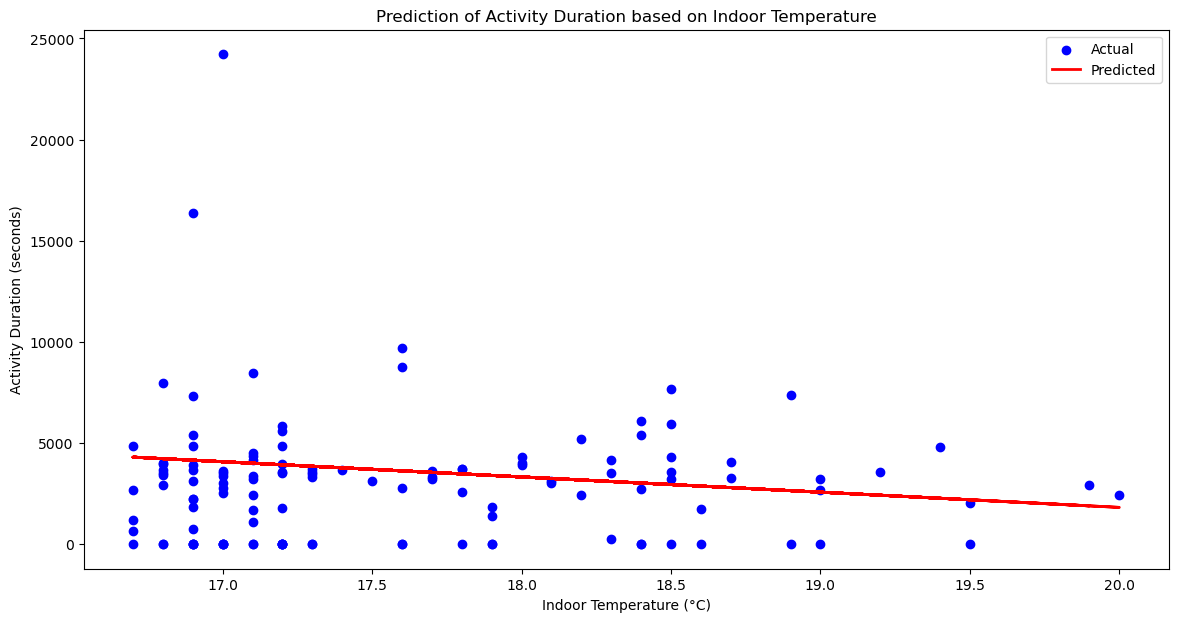

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# # Load datasets
# activity_data = pd.read_csv('AUM_V4_Activity_2024-12-11_20-11-14.csv')
# weather_data = pd.read_csv('london_dynamic_room_temperatures.csv')

# Ensure date and time columns are in string format
activity_data['date'] = activity_data['date'].astype(str)
activity_data['time'] = activity_data['time'].astype(str)

# Convert date and time columns to datetime in activity_data
activity_data['datetime'] = pd.to_datetime(activity_data['date'] + ' ' + activity_data['time'])

# Convert duration to total seconds
def convert_to_seconds(duration_str):
    try:
        h, m, s = map(int, duration_str.split(':'))
        return h * 3600 + m * 60 + s
    except ValueError:
        return 0  # or handle the error as needed

#activity_data['duration_seconds'] = activity_data['duration'].apply(convert_to_seconds)

# Aggregate activity data by hour
activity_data.set_index('datetime', inplace=True)
activity_data_hourly = activity_data['duration_seconds'].resample('H').sum().reset_index()

# Convert datetime column to datetime in weather_data
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Aggregate weather data by hour
weather_data_hourly = weather_data[['datetime', 'room_temp']].set_index('datetime').resample('H').mean().reset_index()

# Merge the data on datetime
merged_data = pd.merge(activity_data_hourly, weather_data_hourly, on='datetime')

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Activity Duration (seconds)', color=color)
ax1.plot(merged_data['datetime'], merged_data['duration_seconds'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Indoor Temperature (°C)', color=color)
ax2.plot(merged_data['datetime'], merged_data['room_temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Activity Duration and Indoor Temperature Over Time')
plt.show()

# Create a heatmap for hourly usage per day
# Extract date and hour from datetime
activity_data_hourly['date'] = activity_data_hourly['datetime'].dt.date
activity_data_hourly['hour'] = activity_data_hourly['datetime'].dt.hour

# Pivot the data to create a matrix for the heatmap
heatmap_data = activity_data_hourly.pivot(index='hour', columns='date', values='duration_seconds')

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.xlabel('Date')
plt.ylabel('Hour')
plt.title('Heatmap of Hourly Activity Duration per Day')
plt.show()

# Create bar plots for hourly usage per day
# Aggregate the total duration per hour for each day
hourly_usage = activity_data_hourly.groupby(['date', 'hour'])['duration_seconds'].sum().unstack()

# Plot bar plots for each day
hourly_usage.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.xlabel('Date')
plt.ylabel('Total Activity Duration (seconds)')
plt.title('Hourly Activity Duration per Day')
plt.legend(title='Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Prepare the data for prediction
X = merged_data[['room_temp']]
y = merged_data['duration_seconds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the R-squared score for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R-squared score for training set: {r2_train}")
print(f"R-squared score for testing set: {r2_test}")

# Visualize the predictions
plt.figure(figsize=(14, 7))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Indoor Temperature (°C)')
plt.ylabel('Activity Duration (seconds)')
plt.title('Prediction of Activity Duration based on Indoor Temperature')
plt.legend()
plt.show()

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Ensure date and time columns are in string format
activity_data['date'] = activity_data['date'].astype(str)
activity_data['time'] = activity_data['time'].astype(str)

# Convert date and time columns to datetime in activity_data
activity_data['datetime'] = pd.to_datetime(activity_data['date'] + ' ' + activity_data['time'])

# Aggregate activity data by hour
activity_data.set_index('datetime', inplace=True)
activity_data_hourly = activity_data['duration_seconds'].resample('H').sum().reset_index()

# Convert datetime column to datetime in weather_data
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Aggregate weather data by hour
weather_data_hourly = weather_data[['datetime', 'room_temp', 'cloudcover', 'outdoor_temp']].set_index('datetime').resample('H').mean().reset_index()

# Merge the data on datetime
merged_data = pd.merge(activity_data_hourly, weather_data_hourly, on='datetime')

# Prepare the data for prediction
X = merged_data[['outdoor_temp', 'cloudcover']]
y = merged_data['duration_seconds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the R-squared score for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R-squared score for training set: {r2_train}")
print(f"R-squared score for testing set: {r2_test}")

/var/folders/yz/h_0c8vlx4plghxkn48_qbd9h0000gn/T/ipykernel_82840/154437471.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  activity_data['datetime'] = pd.to_datetime(activity_data['date'] + ' ' + activity_data['time'])


R-squared score for training set: 0.002048854662661914
R-squared score for testing set: -0.062131513922635495


/var/folders/yz/h_0c8vlx4plghxkn48_qbd9h0000gn/T/ipykernel_82840/154437471.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  activity_data_hourly = activity_data['duration_seconds'].resample('H').sum().reset_index()
/var/folders/yz/h_0c8vlx4plghxkn48_qbd9h0000gn/T/ipykernel_82840/154437471.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_data_hourly = weather_data[['datetime', 'room_temp', 'cloudcover', 'outdoor_temp']].set_index('datetime').resample('H').mean().reset_index()
